In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

try:
    df = pd.read_csv('tested.csv')
    print("Clear")
except FileNotFoundError:
    print("ERROR")

Clear


In [8]:
print("\n--- 5 Baris Pertama ---")
print(df.head())

print("\n--- Informasi Ringkasan ---")
df.info()

print("\n--- Statistik Deskriptif ---")
print(df.describe())


--- 5 Baris Pertama ---
   passengerId  survived  pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           name     sex  age  sibsp  parch  \
0                              Kelly, Mr. James    male   35      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female   47      1      0   
2                     Myles, Mr. Thomas Francis    male   62      0      0   
3                              Wirz, Mr. Albert    male   27      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   22      1      1   

    ticket     fare embarked  30  
0   330911   7.8292        Q NaN  
1   363272   7.0000        S NaN  
2   240276   9.6875        Q NaN  
3   315154   8.6625        S NaN  
4  3101298  12.2875        S NaN  

--- Informasi Ringkasan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 


--- Tingkat Survival Berdasarkan Pclass ---
pclass
1    0.467290
2    0.322581
3    0.330275
Name: survived, dtype: float64


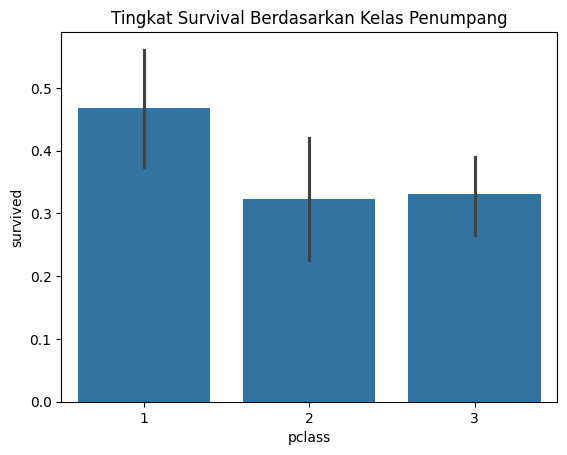

In [9]:
print("\n--- Tingkat Survival Berdasarkan Pclass ---")

print(df.groupby('pclass')['survived'].mean())

sns.barplot(x='pclass', y='survived', data=df)
plt.title('Tingkat Survival Berdasarkan Kelas Penumpang')
plt.show()


--- Tingkat Survival Berdasarkan Jenis Kelamin ---
sex
female    1.0
male      0.0
Name: survived, dtype: float64


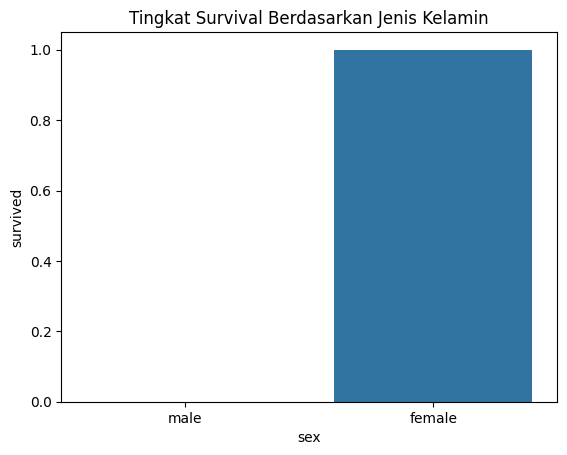

In [10]:
print("\n--- Tingkat Survival Berdasarkan Jenis Kelamin ---")
print(df.groupby('sex')['survived'].mean())

sns.barplot(x='sex', y='survived', data=df)
plt.title('Tingkat Survival Berdasarkan Jenis Kelamin')
plt.show()


--- Distribusi Usia (Selamat vs. Tidak Selamat) ---


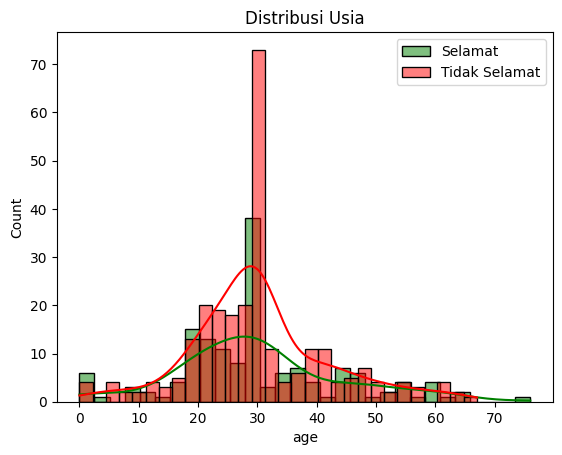

In [11]:
print("\n--- Distribusi Usia (Selamat vs. Tidak Selamat) ---")

survived = df[df['survived']==1]['age'].dropna()
not_survived = df[df['survived']==0]['age'].dropna()

sns.histplot(survived, bins=30, kde=True, label='Selamat', color='green')
sns.histplot(not_survived, bins=30, kde=True, label='Tidak Selamat', color='red')
plt.title('Distribusi Usia')
plt.legend()
plt.show()

In [19]:
df['age'].fillna(df['age'].median(), inplace=True)

if 'fare' in df.columns:
    df['fare'].fillna(df['fare'].median(), inplace=True)

bins = [0, 12, 18, 55, 100]
labels = ['Anak (0-11)', 'Remaja (12-17)', 'Dewasa (18-54)', 'Lansia (55+)']
df['Umur'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

total_penumpang = len(df) 

def hitung_persentase_selamat(df, kolom):
    """Menghitung dan menampilkan persentase kelangsungan hidup per kategori."""
    
    survival_rate = df.groupby(kolom)['survived'].mean() * 100
    
    print(f"\n===== Tingkat Kelangsungan Hidup Berdasarkan {kolom.upper()} =====")
    print(survival_rate.map('{:.2f}%'.format))
    print("="*60)

jumlah_selamat = df['survived'].sum()
persentase_selamat = (jumlah_selamat / total_penumpang) * 100

print("\n===== Persentase Kelangsungan Hidup Keseluruhan =====")
print(f"Total Penumpang: {total_penumpang}")
print(f"Persentase Selamat: {persentase_selamat:.2f}%")
print("="*60)

hitung_persentase_selamat(df, 'sex')
hitung_persentase_selamat(df, 'pclass')
hitung_persentase_selamat(df, 'Umur')

print("\n===== Tingkat Kelangsungan Hidup Berdasarkan Sex dan Pclass =====")
survival_cross = df.pivot_table(index='sex', columns='pclass', values='survived') * 100

print("Tingkat Kelangsungan Hidup (dalam %):")
print(survival_cross.map('{:.2f}'.format))
print("="*60)


===== Persentase Kelangsungan Hidup Keseluruhan =====
Total Penumpang: 418
Persentase Selamat: 36.36%

===== Tingkat Kelangsungan Hidup Berdasarkan SEX =====
sex
female    100.00%
male        0.00%
Name: survived, dtype: object

===== Tingkat Kelangsungan Hidup Berdasarkan PCLASS =====
pclass
1    46.73%
2    32.26%
3    33.03%
Name: survived, dtype: object

===== Tingkat Kelangsungan Hidup Berdasarkan UMUR =====
Umur
Anak (0-11)       45.45%
Remaja (12-17)    36.84%
Dewasa (18-54)    34.94%
Lansia (55+)      48.00%
Name: survived, dtype: object

===== Tingkat Kelangsungan Hidup Berdasarkan Sex dan Pclass =====
Tingkat Kelangsungan Hidup (dalam %):
pclass       1       2       3
sex                           
female  100.00  100.00  100.00
male      0.00    0.00    0.00


/tmp/ipykernel_13427/305782073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipykernel_13427/305782073.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr